### Deep Learning ANN Model with Structured Data to predict Classification of RCA

In [1]:
! python -c 'tensorflow' || pip tensorflow --user

In [2]:
import tensorflow as tf
import os 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [3]:
# Load Data and review contents
rca_data = pd.read_csv("root_cause_analysis.csv")
print("-----------------\nLoaded Data : \n-----------------")

-----------------
Loaded Data : 
-----------------


In [4]:
print(rca_data.head())

   ID  CPU_LOAD  MEMORY_LEAK_LOAD  DELAY  ERROR_1000  ERROR_1001  ERROR_1002  \
0   1         0                 0      0           0           1           0   
1   2         0                 0      0           0           0           0   
2   3         0                 1      1           0           0           1   
3   4         0                 1      0           1           1           0   
4   5         1                 1      0           1           0           1   

   ERROR_1003     ROOT_CAUSE  
0           1    MEMORY_LEAK  
1           1    MEMORY_LEAK  
2           1    MEMORY_LEAK  
3           1    MEMORY_LEAK  
4           0  NETWORK_DELAY  


In [5]:
# Using a label encoder to convert String to numeric values for the target variables
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
rca_data['ROOT_CAUSE'] = label_encoder.fit_transform(rca_data['ROOT_CAUSE'])

In [6]:
# Convert Pandas DataFrame to a numpy vector
np_rca_data = rca_data.to_numpy().astype(float)

In [7]:
np_rca_data

array([[   1.,    0.,    0., ...,    0.,    1.,    1.],
       [   2.,    0.,    0., ...,    0.,    1.,    1.],
       [   3.,    0.,    1., ...,    1.,    1.,    1.],
       ...,
       [ 998.,    1.,    1., ...,    0.,    0.,    1.],
       [ 999.,    0.,    1., ...,    0.,    0.,    2.],
       [1000.,    1.,    0., ...,    1.,    0.,    0.]])

### Extract Feature and Target Variables

In [8]:
#Extract the feature variables X
X_data = np_rca_data[:, 1:8]

#Extract the Target Variables Y
Y_data = np_rca_data[:, -1]
print("\nFeature variables : \n-----------------")
print(X_data[:5, :])

print("\nTarget variables : \n-----------------")
print(Y_data[:5])


Feature variables : 
-----------------
[[0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1. 1.]
 [0. 1. 0. 1. 1. 0. 1.]
 [1. 1. 0. 1. 0. 1. 0.]]

Target variables : 
-----------------
[1. 1. 1. 1. 2.]


In [9]:
#Converting target variable as a one-hot-encoding array to create 3 columns to represent categories  
Y_data = tf.keras.utils.to_categorical(Y_data, 3)

In [10]:
# Splitting training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.10)

print("\nTrain Test Dimentions : \n-----------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Train Test Dimentions : 
-----------------
(900, 7) (900, 3) (100, 7) (100, 3)


### Building and Evaluating a Deep Learning Model for Predicting RCA Classification

In [11]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

# Number of cclasses in the target variables
NB_Classes = len(label_encoder.classes_)
N_HIDDEN=128

# Create a sequential model in Keras
model = tf.keras.models.Sequential()

#Add a first hidden layer with relu activation
model.add(keras.layers.Dense(N_HIDDEN, input_shape =(7, ), name='Hidden-Layer-1', activation='relu'))

#Add a second hidden layer with relu activation
model.add(keras.layers.Dense(N_HIDDEN, name ='Hidden-Layer-2', activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_Classes, name='Output-Layer-3', activation='softmax'))

#Compile the model with loss and metrics
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Print the model meta-data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               1024      
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer-3 (Dense)      (None, 3)                 387       
                                                                 
Total params: 17,923
Trainable params: 17,923
Non-trainable params: 0
_________________________________________________________________



Training Progess: 
-----------------
Epoch 1/20
12/12 [==============================] - 1s 25ms/step - loss: 0.8652 - accuracy: 0.7319 - val_loss: 0.6978 - val_accuracy: 0.7556
Epoch 2/20
12/12 [==============================] - 0s 9ms/step - loss: 0.6173 - accuracy: 0.7944 - val_loss: 0.5501 - val_accuracy: 0.7889
Epoch 3/20
12/12 [==============================] - 0s 9ms/step - loss: 0.5225 - accuracy: 0.8125 - val_loss: 0.5059 - val_accuracy: 0.7667
Epoch 4/20
12/12 [==============================] - 0s 9ms/step - loss: 0.4832 - accuracy: 0.8097 - val_loss: 0.4824 - val_accuracy: 0.8111
Epoch 5/20
12/12 [==============================] - 0s 9ms/step - loss: 0.4698 - accuracy: 0.8236 - val_loss: 0.4670 - val_accuracy: 0.8056
Epoch 6/20
12/12 [==============================] - 0s 9ms/step - loss: 0.4562 - accuracy: 0.8333 - val_loss: 0.4630 - val_accuracy: 0.8056
Epoch 7/20
12/12 [==============================] - 0s 8ms/step - loss: 0.4488 - accuracy: 0.8278 - val_loss: 0.4527 - va

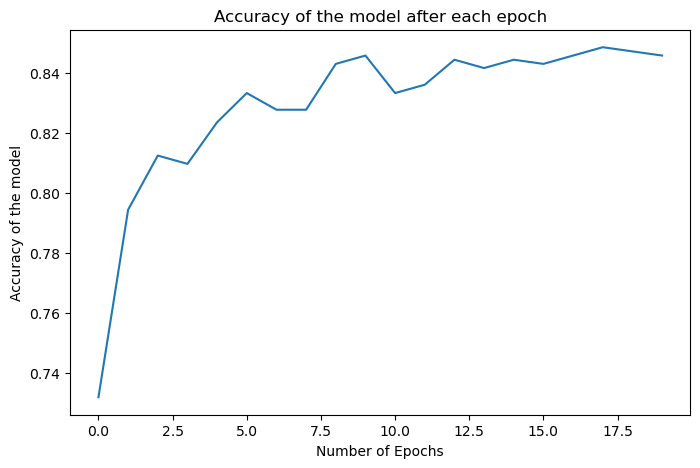


Evaluation against the test dataset: 
-----------------
4/4 [==============================] - 0s 5ms/step - loss: 0.4180 - accuracy: 0.8700


[0.41804325580596924, 0.8700000047683716]

In [12]:
# Making it versbose to view the progress
VERBOSE = 1

# Setting up Hyper Parameters for training

# Set Batch Size
BATCH_SIZE = 64

#Set number of epochs
EPOCHS = 20

#Set validation split. 20% of the training data will be used for validation after each epoch
VALIDATION_SPLIT = 0.2

print("\nTraining Progess: \n-----------------")

#Fit the model. This will perform the entire training cycle, including forward propagation, loss computation, backpropagation 
#and gradient descent.
# Execute for the specified batch sizes and epoch
# Perform validation after each epoch
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training Progess: \n-----------------")
import matplotlib.pyplot as plt

# Plot accuracy of the model after each epoch
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8, 5))
plt.title("Accuracy of the model after each epoch")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy of the model")
plt.show() 

#Evaluate the model against the test dataset and print the results
print("\nEvaluation against the test dataset: \n-----------------")
model.evaluate(X_test, Y_test)

### Predicting Root Cause

In [13]:
import warnings

warnings.filterwarnings("ignore")

# Pass the individual flags to predict the root cause
CPU_lOAD = 1
MEMORY_LEAK_LOAD = 0
DELAY = 0
ERROR_1000 = 0
ERROR_1001 = 1
ERROR_1002 = 1
ERROR_1003 = 0

prediction = np.argmax(model.predict(
    [[CPU_lOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000, ERROR_1001, ERROR_1002, ERROR_1003]]), 
                        axis=1)

print("Prediction is ", label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 115ms/step
Prediction is  ['DATABASE_ISSUE']


### Predicting as a Batch

In [16]:
print("Prediction is ", label_encoder.inverse_transform(np.argmax(model.predict(
    [[1, 0, 0, 0, 1, 1, 0], [0, 1, 1, 1, 0, 0, 0], [1, 1, 0, 1, 1, 0, 1], [0, 0, 0, 0, 0, 1, 0], [1, 0, 1, 0, 1, 1, 1]]), 
                        axis=1)))

1/1 [==============================] - 0s 72ms/step
Prediction is  ['DATABASE_ISSUE' 'NETWORK_DELAY' 'MEMORY_LEAK' 'DATABASE_ISSUE'
 'DATABASE_ISSUE']
